In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./dados/cases-brazil-states.csv')
df['data'] = pd.to_datetime(df['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


# Decomposição

In [5]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [32]:
resultados = seasonal_decompose(df_sp['Casos'], period=7)
resultados

In [33]:
df_sp.index = pd.to_datetime(df_sp.data)

In [34]:
resultados.observed

data
2020-02-25         1.0
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         2.0
2020-02-29         2.0
                ...   
2020-07-27    487654.0
2020-07-28    500301.0
2020-07-29    514197.0
2020-07-30    529006.0
2020-07-31    542304.0
Name: Casos, Length: 158, dtype: float64

In [35]:
resultados.seasonal

data
2020-02-25   -1307.553362
2020-02-26    -443.976986
2020-02-27     349.023014
2020-02-28    1475.167418
2020-02-29    1509.147937
                 ...     
2020-07-27   -1865.429985
2020-07-28   -1307.553362
2020-07-29    -443.976986
2020-07-30     349.023014
2020-07-31    1475.167418
Name: seasonal, Length: 158, dtype: float64

In [36]:
resultados.trend

data
2020-02-25              NaN
2020-02-26              NaN
2020-02-27              NaN
2020-02-28         1.571429
2020-02-29         1.714286
                  ...      
2020-07-27    493977.000000
2020-07-28    505275.000000
2020-07-29              NaN
2020-07-30              NaN
2020-07-31              NaN
Name: trend, Length: 158, dtype: float64

In [37]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.legend(fontsize=18)

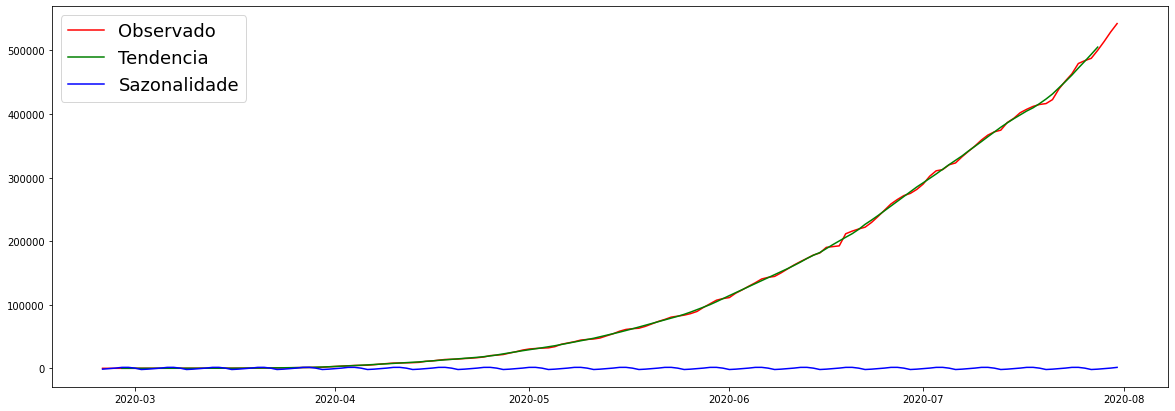

In [38]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red', 'green', 'blue', 'Observado', 'Tendencia', 'Sazonalidade')

**TENDÊNCIA** - a tendência é definida como crescimento ou decrescimento ao longo de um período de tempo.

**SAZONALIDADE** - a Sazonalidade é a variação repetitiva em função de fatores externos: tempo, férias, feriados, etc. Ocorre em uma frequência fixa.

**SÉRIE ESTACIONÁRIA** - Quando a média e a variância são constantes ao longo do tempo. Ou seja, quando não há tendência ou sazonalidade aparentes!

**DIFERENCIAÇÃO** - Cálculo da diferença entre *LAGS*(ou valores observados), Normalmente isso transforma uma série não-estacionária em estacionária.

**Teste ADF** - É um cálculo estatístico que vai determinar o quão uma série temporal pode ser definida pela sua tendência. Ele é um teste de hipótese:
    - Hipótese nula: a série é não estacionária e é dependente do tempo.
    - Hipótese alternativa: a série é estacionária.
    Nós calculamos o valor-p e, caso ele seja abaixo de um valor limite, rejeitamos a hipotese nula e a série é estacionária.

# **AUTOCORRELAÇÃO**

- A correlação é a medida de quanto duas variáveis estão linearmente relacionadas;

- A **AUTOCORRELAÇÃO** é a medida de quanto duas observações da mesma **SÉRIE TEMPORAL** estão linearmente relacionadas.(Observa o quanto que duas observações da mesma série temporal estão linearmente relacionadas)

## ACF - AUTO CORRELATION FUNCTION OU FUNÇÃO DE AUTOCORRELAÇÃO

# **AUTOCORRELAÇÃO PARCIAL**

Em geral, a correlação "PARCIAL"  entre duas variaveis é a quantidade de correlação entre elas que não é explicada por suas correlções mutuas com um conjunto especificado de outras variáveis.

A **AUTOCORRELAÇÃO PARCIAL** determina a correlação entre o dado observado e o resíduo.

In [46]:
y = df_sp['Casos']
y.head()

data
2020-02-25    1
2020-02-26    1
2020-02-27    1
2020-02-28    2
2020-02-29    2
Name: Casos, dtype: int64

In [47]:
from statsmodels.tsa.stattools import adfuller

adfuller(y.dropna())

(1.36647436128035,
 0.9969563888815705,
 14,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 2627.7242380318335)

In [48]:
print(f'p-valor: {adfuller(y.dropna())[1]}')

p-valor: 0.9969563888815705


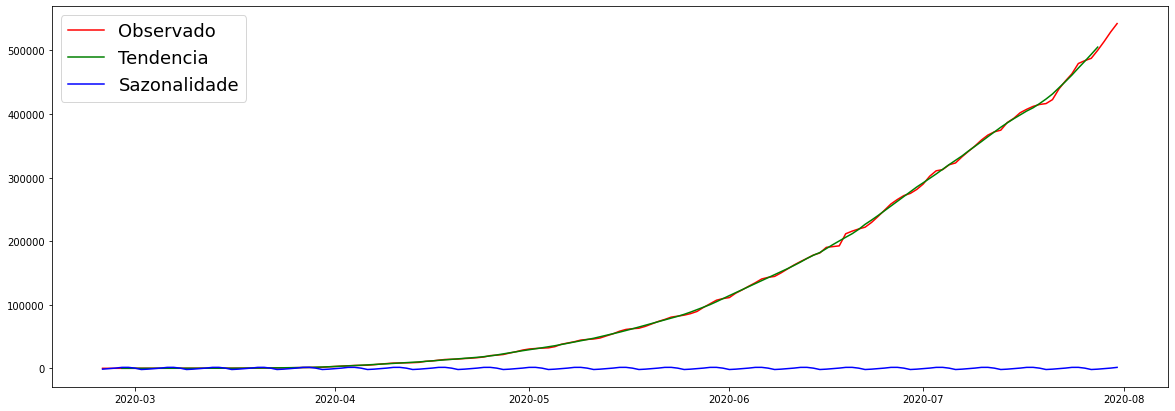

In [49]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red', 'green', 'blue', 'Observado', 'Tendencia', 'Sazonalidade')

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [65]:
def plotarACF(y1):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax=ax1, title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax=ax2, title='1ª DIFERENCIAÇÃO')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax=ax3, title='2ª DIFERENCIAÇÃO')
    

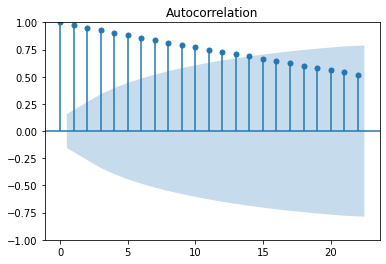

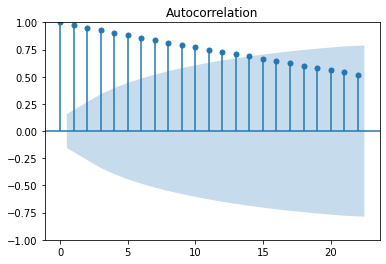

In [66]:
plot_acf(y)

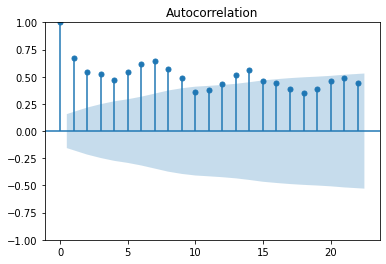

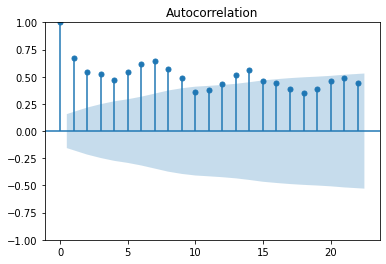

In [68]:
plot_acf(y.diff().dropna())

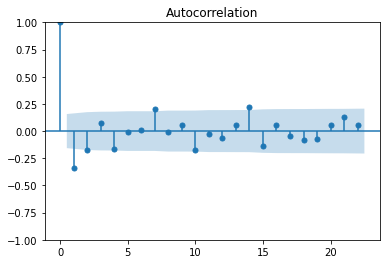

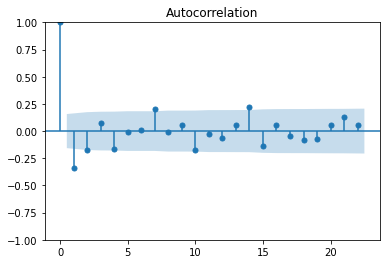

In [69]:
plot_acf(y.diff().diff().dropna())

# ARIMA

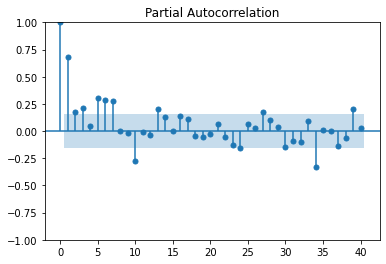

In [71]:
plot_pacf(y.diff().dropna(), lags=40);

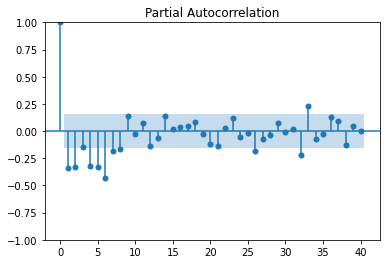

In [72]:
plot_pacf(y.diff().diff().dropna(), lags=40);

 *Temos o p, que é relacionado à parte do modelo autorregressivo, temos o q, que é relacionado à parte do moving average e temos o d, que é a parte da diferenciação.

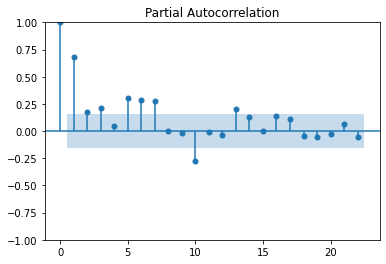

In [73]:
plot_pacf(y.diff().dropna());

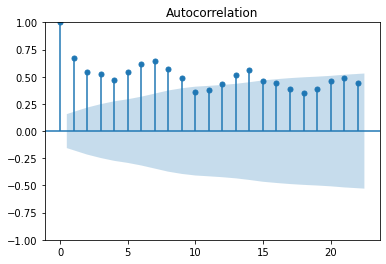

In [74]:
plot_acf(y.diff().dropna());

In [80]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(y, order=(1,1,1), freq='D')
modelo_fit = modelo.fit()
print(modelo_fit.summary())

C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Casos   No. Observations:                  158
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1456.914
Date:                Thu, 26 Jan 2023   AIC                           2919.828
Time:                        10:14:23   BIC                           2928.997
Sample:                    02-25-2020   HQIC                          2923.552
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    182.282      0.000       0.989       1.011
ma.L1         -0.8471      0.035    -24.150      0.000      -0.916      -0.778
sigma2      6.673e+06   2.04e-09   3.28e+15      0.0

# **ARIMA**

ARIMA é um acrônimo para **AR(autoregressivo)**, **I(integrado)**, **MA(média móvel)**;

É um modelo que une outros dois modelos e uma diferencição;

É uma regressão linear que utiliza valores do passado para prever o futuor;

O **I** vai dizer quantas vezes necessitaremos diferenciar nossa serie temporal para fazer com que ela seja temporária;

O **AR(autoregressivo)** é uma **REGRESSÃO LINEAR**, você vai um certo número  de dados do passado;

In [81]:
import itertools

In [82]:
p = d = q = range(0,2)

pdq = list(itertools.product( p, d, q))

In [83]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [84]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [85]:
print(f'Exemplo de combinacao de parametros para o ARIMA Sazonal - SARIMAX : {pdq[0], seasonal_pdq[0]}')

Exemplo de combinacao de parametros para o ARIMA Sazonal - SARIMAX : ((0, 0, 0), (0, 0, 0, 7))


In [86]:
y = df_sp['Casos']

In [87]:
import statsmodels.api as sm

In [88]:
aic_lista = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX( y, order=param, seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista.append(f'ARIMA{param}x{param_seasonal} - AIC{results}')

C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundatio

In [90]:
aic_lista[0]

'ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000259F727B0A0>'

In [91]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1,), seasonal_order=(1,1,1,7))

C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [92]:
results = mod.fit()

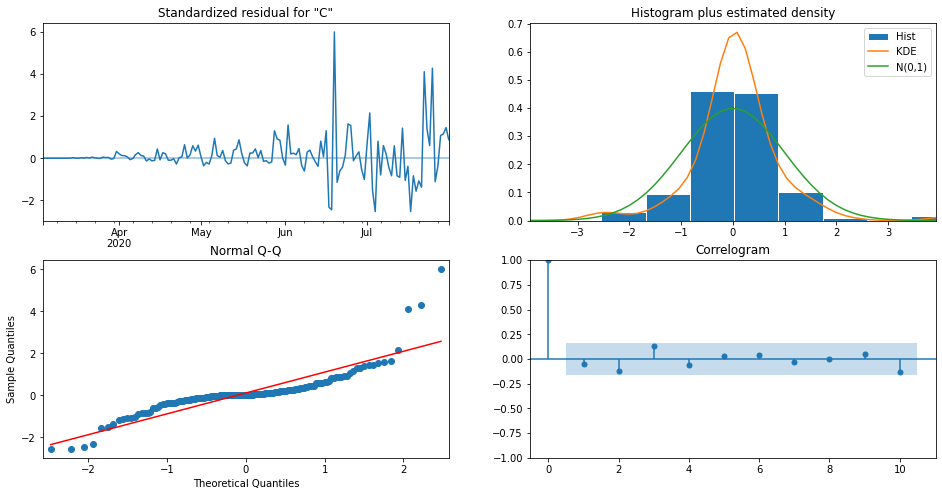

In [94]:
results.plot_diagnostics(figsize=(16,8));

In [95]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred_ic = pred.conf_int()
pred_ic

,lower Casos,upper Casos
2020-07-01,284123.375122,292788.003786
2020-07-02,293087.027776,301751.654014
2020-07-03,309712.952174,318377.576301
2020-07-04,313808.532634,322473.154923
2020-07-05,314049.607156,322714.227846
2020-07-06,320494.706887,329159.326185
2020-07-07,327045.859937,335710.479074
2020-07-08,336585.408152,345250.026064
2020-07-09,346345.022252,355009.638965
2020-07-10,356625.681163,365290.296833


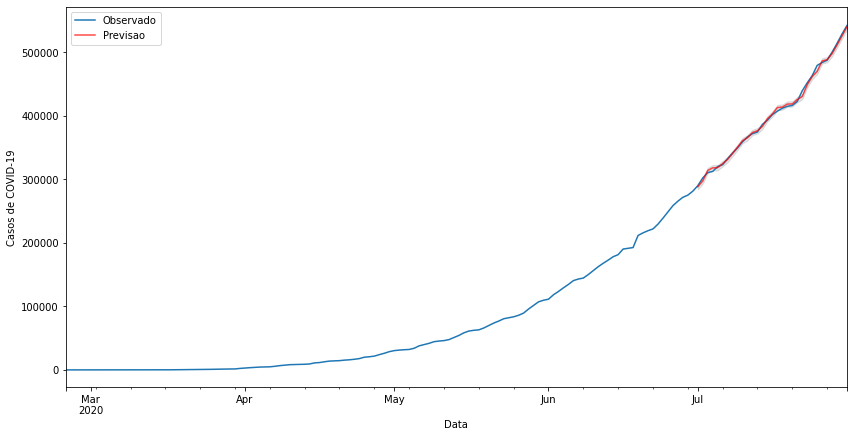

In [100]:
ax = y['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsao', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()


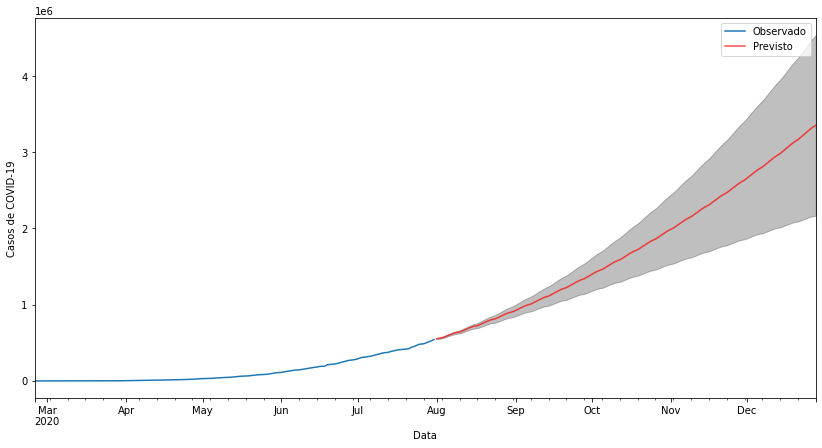

In [101]:
pred_uc = results.get_forecast(steps=150)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()


In [103]:
df_att = pd.read_csv('./dados/cases-brazil-states.csv')
df_att = df_att[df_att['estado'] == 'SP']
df_att.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [106]:
df_att['data'] = pd.to_datetime(df_att['data']).dt.date

In [104]:
df_att.index = df_att['data']

In [105]:
df_att.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [116]:
x = df_att['Casos']
x.dropna

<bound method Series.dropna of data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64>

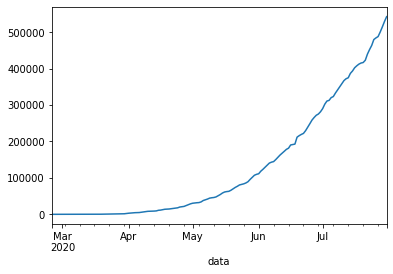

In [117]:
ax = y.plot(label='Observado')

In [ ]:
plt.figure(figsize=(20,7))
fig = plt.plot(x, label='Correto')
ax = y.plot(label='Observado')
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()
